In [3]:
#Reserarch Project: College Affordability
#Group 16: Ash Chigavazira, Lasya Maddula, Daniil Gavrilov, Precious Gilbert, Zack Baldorado 

In [4]:
#Research Question: Do colleges with higher tuition rates have higher graduation rates?

In [88]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
data= pd.read_csv(r"C:\Users\preci\OneDrive\Documents\School\Data and Society\Projects\College_Data (1).csv")

In [92]:
data = data.rename(columns={'Grad Rates': 'Grad_Rates'})
data = data.rename(columns = {'S.F.Ratio': 'SF_Ratio'})
data = data.rename(columns = {'Room.Board': 'RoomBoard'})
data = data.rename(columns = {'F.Undergrad': 'F_undergrad'})
data.head()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_undergrad,P.Undergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SF_Ratio,perc.alumni,Expend,Grad_Rates
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [129]:
print(college_data.dtypes)

accept_rate    float64
SF_Ratio       float64
Outstate         int64
Enrollment     float64
expend           int64
Top25perc        int64
RoomBoard        int64
Personal         int64
GradRates        int64
dtype: object


In [94]:
data.dropna()

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F_undergrad,P.Undergrad,Outstate,RoomBoard,Books,Personal,PhD,Terminal,SF_Ratio,perc.alumni,Expend,Grad_Rates
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,No,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,Yes,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,Yes,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,Yes,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   777 non-null    object 
 1   Private      777 non-null    object 
 2   Apps         777 non-null    int64  
 3   Accept       777 non-null    int64  
 4   Enroll       777 non-null    int64  
 5   Top10perc    777 non-null    int64  
 6   Top25perc    777 non-null    int64  
 7   F_undergrad  777 non-null    int64  
 8   P.Undergrad  777 non-null    int64  
 9   Outstate     777 non-null    int64  
 10  RoomBoard    777 non-null    int64  
 11  Books        777 non-null    int64  
 12  Personal     777 non-null    int64  
 13  PhD          777 non-null    int64  
 14  Terminal     777 non-null    int64  
 15  SF_Ratio     777 non-null    float64
 16  perc.alumni  777 non-null    int64  
 17  Expend       777 non-null    int64  
 18  Grad_Rates   777 non-null    int64  
dtypes: float

In [124]:
print(college_data.isnull().sum())
print(college_data.isnull().sum())
print(college_data.isin([np.inf, -np.inf]).any())

accept_rate    0
SF_Ratio       0
Outstate       0
Enrollment     0
expend         0
Top25perc      0
RoomBoard      0
Personal       0
GradRates      0
dtype: int64
accept_rate    0
SF_Ratio       0
Outstate       0
Enrollment     0
expend         0
Top25perc      0
RoomBoard      0
Personal       0
GradRates      0
dtype: int64
accept_rate    False
SF_Ratio       False
Outstate       False
Enrollment     False
expend         False
Top25perc      False
RoomBoard      False
Personal       False
GradRates      False
dtype: bool


In [134]:
data['accept_rate'] = (data['Accept']/data['Apps'])

In [136]:
data['enroll_rate'] = (data['Enroll']/data['Apps'])

In [138]:
college_data = pd.DataFrame({"accept_rate":data['accept_rate'],"SF_Ratio": data['SF_Ratio'],"Outstate":data['Outstate'],
                             "Enrollment": data['enroll_rate'],"expend": data['Expend'],"Top25perc": data['Top25perc'],
                             "RoomBoard": data['RoomBoard'],"Personal": data['Personal'],"GradRates": data['Grad_Rates']})
college_data.head()

,accept_rate,SF_Ratio,Outstate,Enrollment,expend,Top25perc,RoomBoard,Personal,GradRates
0,0.742169,18.1,7440,0.434337,7041,52,3300,2200,60
1,0.880146,12.2,12280,0.234218,10527,29,6450,1500,56
2,0.768207,12.9,11250,0.235294,8735,50,3750,1165,54
3,0.836930,7.7,12960,0.328537,19016,89,5450,875,59
4,0.756477,11.9,7560,0.284974,10922,44,4120,1500,15


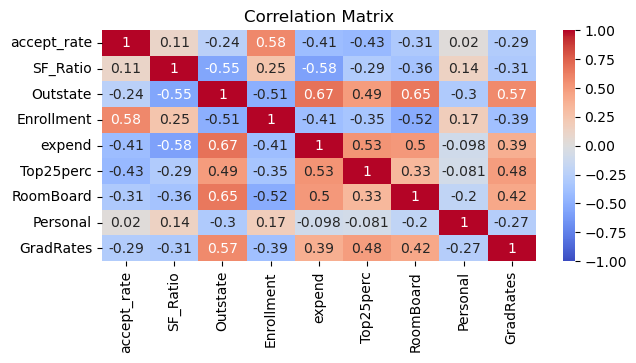

In [140]:
# Correlation Heatmap
plt.figure(figsize= (7,3))
sns.heatmap(college_data.corr(), annot= True , cmap ="coolwarm", vmin=-1, vmax= 1)
plt.title("Correlation Matrix")
plt.show()

In [145]:
college_model = smf.ols(formula= 'Grad_Rates ~ accept_rate + Outstate + enroll_rate + SF_Ratio + Expend + Top25perc+ RoomBoard+ F_undergrad+ Personal + 0', data=data).fit()
college_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Grad_Rates   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.958
Method:                 Least Squares   F-statistic:                              1973.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                        0.00
Time:                        11:35:09   Log-Likelihood:                         -3140.7
No. Observations:                 777   AIC:                                      6299.
Df Residuals:                     768   BIC:                                      6341.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
accept_rate    10.6233      3.937      2.699      0.007       2.895      18.351
Outstate        0.0018      0.000      7.769      0.000       0.001       0.002
enroll_rate     1.0597      5.725      0.185      0.853     -10.180      12.299
SF_Ratio        0.7432      0.134      5.526      0.000       0.479       1.007
Expend      -1.955e-05      0.000     -0.131      0.896      -0.000       0.000
Top25perc       0.3172      0.031     10.095      0.000       0.256       0.379
RoomBoard       0.0030      0.001      5.100      0.000       0.002       0.004
F_undergrad    -0.0002      0.000     -1.524      0.128      -0.000    5.35e-05
Personal       -0.0013      0.001     -1.695      0.090      -0.003       0.000
==============================================================================
Omnibus:                       26.056   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               48.905
Skew:                           0.212   Prob(JB):                     2.40e-11
Kurtosis:                       4.153   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
#the test shows which variables are insignificant: 
#Full time undergrad students, enrollment rate, expendeture rate, and Perecentage of Alumni who donated to the school

In [ ]:
#because there are strong indications of multicollinearity, we will also run a VIF test
model = pd.DataFrame(college_data['accept_rate'], college_data['Outstate'],college_data['SF_Ratio'],college_data['Top25perc']
                    ,college_data['RoomBoard'])
vif_data['Feature'] = model.columns
vif_data['VIF'] = [variance_inflation_factor(model.values, i) for i in range(model.shape[1])]

vif_data

In [ ]:
#removal of unnecessary or insignificant variables 
#creating a new model to test the relationship between Graduation rates and 
#

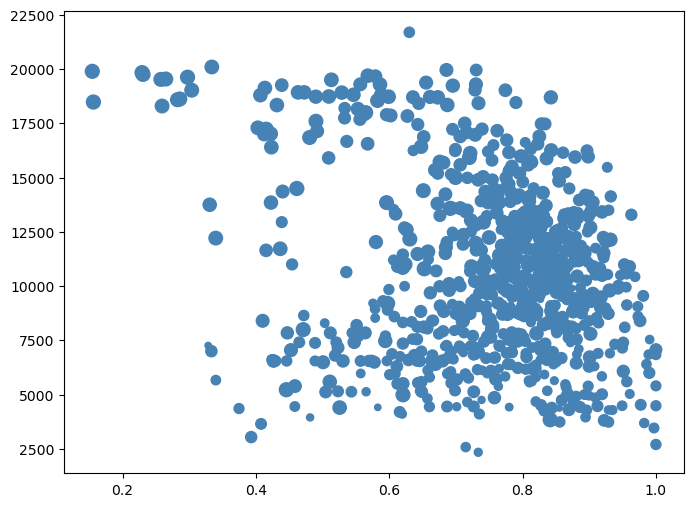

In [16]:
#scatterplot of both independent variables(acceptance rate and out of state tuition) and the y variable
plt.figure(figsize = (8,6))
plt.scatter(data['accept_rate'], data['Outstate'], data['Grad_Rates'], color= 'steelblue')
plt.show()

Text(0.5, 1.0, 'Graduation Rates vs Tuition Costs')

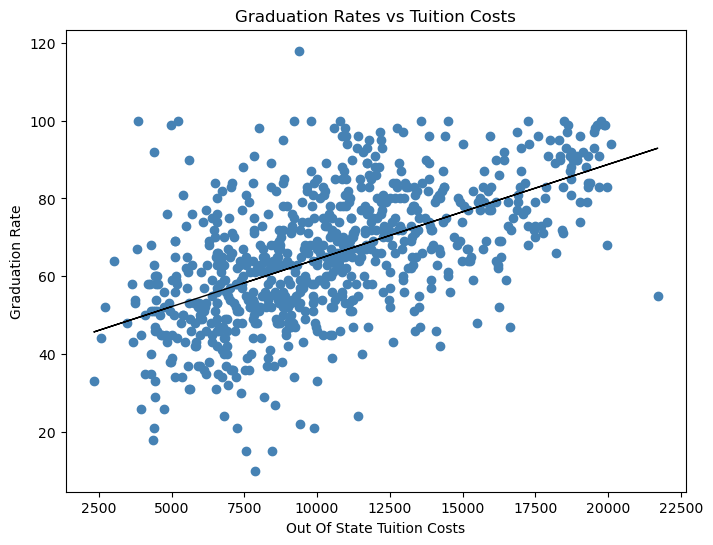

In [17]:
#visualtization Scatter plot to observe relationships b/w grad rate and tuition
plt.figure(figsize = (8,6))
plt.scatter(data['Outstate'], data['Grad_Rates'], color= 'steelblue')

x =data['Outstate']
y = data['Grad_Rates']
slope, intercept = np.polyfit(x, y, 1)  # 1 indicates linear fit
line_of_best_fit = slope * x + intercept
plt.plot(x, line_of_best_fit, color='black', linewidth=1)
   
plt.xlabel('Out Of State Tuition Costs')
plt.ylabel('Graduation Rate')
plt.title("Graduation Rates vs Tuition Costs")

Text(0.5, 1.0, 'Graduation Rates vs Acceptance Rate')

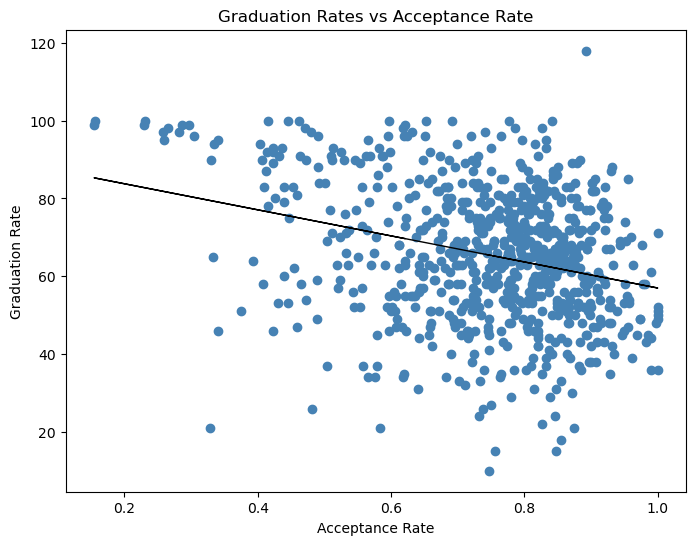

In [18]:
# Scatter plot matrix to observe relationships b/w grad rate and number of applicates accepted
plt.figure(figsize = (8,6))
plt.scatter(data['accept_rate'], data['Grad_Rates'], color= 'steelblue')

x =data['accept_rate']
y = data['Grad_Rates']
slope, intercept = np.polyfit(x, y, 1)  # 1 indicates linear fit
line_of_best_fit = slope * x + intercept
plt.plot(x, line_of_best_fit, color='black', linewidth=1)
   

plt.xlabel('Acceptance Rate')
plt.ylabel('Graduation Rate')
plt.title("Graduation Rates vs Acceptance Rate")

In [19]:
#next building a model for Private School Graduation Rate vs Out of State tuition Costs and Acceptance Rate
#model= smf.ols(formula = 'Grad Rates ~ Accept + Outstate', data=data).fit() #!!!! having trouble with building the model using Grad Rate
#model.summary()

import statsmodels.formula.api as smf  # Correct import statement

# Assuming 'data' is already defined and contains the necessary columns
model = smf.ols(formula= 'Grad_Rates ~ accept_rate + Outstate + 0', data=data).fit()  # Use backticks for column names with spaces # Using backticks to handle the space
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:             Grad_Rates   R-squared (uncentered):                   0.942
Model:                            OLS   Adj. R-squared (uncentered):              0.942
Method:                 Least Squares   F-statistic:                              6325.
Date:                Mon, 02 Dec 2024   Prob (F-statistic):                        0.00
Time:                        11:00:13   Log-Likelihood:                         -3269.4
No. Observations:                 777   AIC:                                      6543.
Df Residuals:                     775   BIC:                                      6552.
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
accept_rate    35.5626      1.751     20.307      0.000      32.125      39.000
Outstate        0.0036      0.000     30.213      0.000       0.003       0.004
==============================================================================
Omnibus:                       24.867   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.733
Skew:                           0.297   Prob(JB):                     1.74e-08
Kurtosis:                       3.867   Cond. No.                     3.35e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.35e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
#Check model for multicolinearity

In [22]:
#creating our data frame using our variables 
df = pd.DataFrame({'Acceptance_Rate': data['accept_rate'], 'Outstate_Tuition': data['Outstate']})
df.head()

,Acceptance_Rate,Outstate_Tuition
0,0.742169,7440
1,0.880146,12280
2,0.768207,11250
3,0.836930,12960
4,0.756477,7560


In [23]:
vif_data = pd.DataFrame()
vif_data['Feature'] = df.columns
vif_data['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]

vif_data

,Feature,VIF
0,Acceptance_Rate,5.209643
1,Outstate_Tuition,5.209643


In [24]:
#Data suggests no multicollinearity between the predictor variables (no Multicollinearity) 

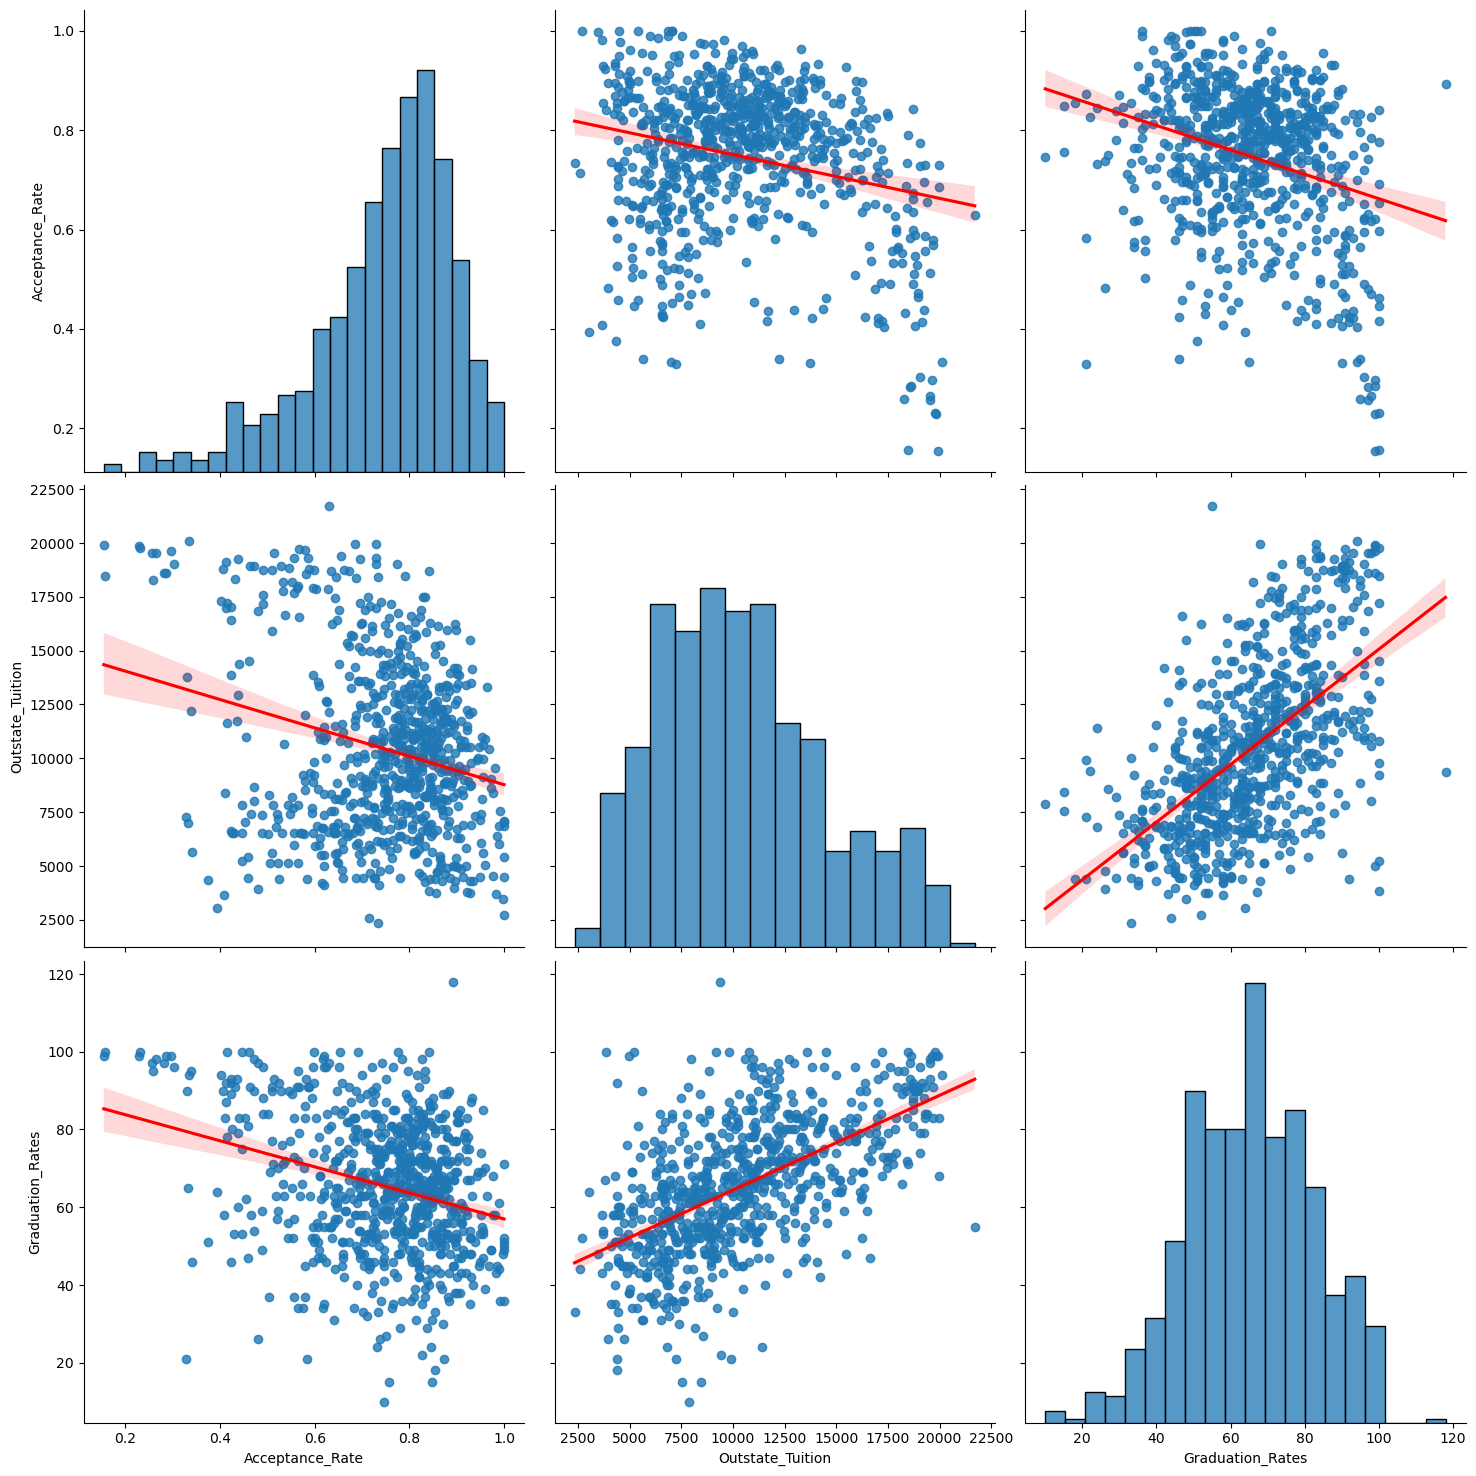

In [25]:
# Visualization

#plt.figure(figsize = (5,5))
grad_data = pd.DataFrame({'Acceptance_Rate': data['accept_rate'], 'Outstate_Tuition': data['Outstate'],'Graduation_Rates': data['Grad_Rates']})
sns.pairplot(grad_data,kind = 'reg',height=5, plot_kws={'line_kws': {'color': 'red'}})
#plt.show()

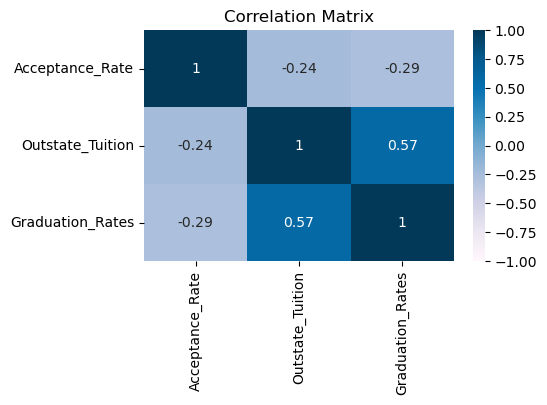

In [26]:
# Correlation Heatmap
plt.figure(figsize= (5,3))
sns.heatmap(grad_data.corr(), annot= True , cmap ="PuBu", vmin=-1, vmax= 1)
plt.title("Correlation Matrix")
plt.show()


In [27]:
# Correlation Heatmap